In [3]:
#imort các dữ liệu cần thiết cho việc xử lý dữ liệu và biuld model phân loại và dự đoán xu hướng học tập của người học trên trang web học online 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# import torchtext
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence, pad_sequence
from torch.nn import functional as F
from torch.autograd import Variable

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC, SVR
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBRegressor


In [6]:
# chúng ta có thể lập thêm một cột số lượt đăng ký của khóa học để dự đoán xu hướng học tập của người học trên trang web học online Edumall
# lấy dữ liệu từ file edumall_cleaned2.csv

df = pd.read_csv('/Users/hongviet/Documents/GitHub/Data-Analysis/GroupTask/edumall_cleaned4.csv')
df
# data4 = data4.assign(Number_of_enroll=np.random.randint(5, 100, size=len(data4)))
# data4.to_csv('/Users/hongviet/Documents/GitHub/Data-Analysis/GroupTask/edumall_cleaned4.csv', index=False)


,Unnamed: 0,Author,Coursename,Last_updated,Lectures,Newfee,Oldfee,Rating,Sections,Time,Topic,Target,_id,Number_of_enroll
0,1,Edumall Learning,Thuyết trình chuyên nghiệp & ấn tượng,2024-08-08,28,99999.0,199999.0,5.0,6,28,Other,"['ôn tập kiến thức liên tục, tăng hiệu quả học...",66f79d3af050d8d70ad24671,38
1,2,Edumall Learning,Ứng tuyển thành công - Phỏng vấn hiệu quả,2024-04-26,36,99999.0,199999.0,5.0,6,36,Phát Triển Bản Thân,"['cung cấp kiến thức, kỹ năng & kinh nghiệm về...",66f79d3af050d8d70ad24672,45
2,3,Nguyễn Đình Hoa Cương,Procedural Python - Lập trình hàm trong Python,2024-07-03,82,199999.0,399999.0,5.0,8,78,Lập Trình - CNTT,"['nắm bắt sơ lược các khái niệm về hàm', 'thực...",66f79d3af050d8d70ad24673,77
3,4,Nguyễn Đình Hoa Cương,Python Basics - Python Cơ Bản,2022-11-02,128,199999.0,399999.0,5.0,11,126,Lập Trình - CNTT,"['cung cấp kiến thức, kỹ năng và phương pháp l...",66f79d3af050d8d70ad24674,52
4,5,Trần Thảo Vi,YOGA CHO BÀ BẦU - BÍ QUYẾT CHO MỘT THAI KỲ KHỎ...,2022-07-04,21,449000.0,449000.0,5.0,5,617,Thể Thao - Sức Khỏe,['tăng cường sức đề kháng giúp mẹ bầu có sức k...,66f79d3af050d8d70ad24675,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,1494,Trần Thế Long,Yoga dưỡng sinh tại nhà,2021-12-15,14,299000.0,399000.0,5.0,3,209,Thể Thao - Sức Khỏe,['khóa học này giúp học viên có khả năng tự tr...,66f79d3af050d8d70ad24c46,68
1460,1495,Chu Thị Thanh Hương,Chiến lược dạy trẻ tự kỷ hồi phục,2022-05-17,14,299000.0,599000.0,4.0,4,91,Hôn Nhân - Gia Đình,['khóa học này tôi sẽ nói đến phương pháp son-...,66f79d3af050d8d70ad24c47,70
1461,1497,Hồ Thị Phương Anh,10 ngày trở thành chuyên gia tinh dầu chăm sóc...,2022-03-04,16,399000.0,699000.0,4.2,6,87,Hôn Nhân - Gia Đình,['học viên có được sức khỏe từ sử dụng thảo dư...,66f79d3af050d8d70ad24c49,29
1462,1498,Đỗ Trung Thành,Làm chủ Word 2016 từ cơ bản đến nâng cao,2022-06-10,43,399000.0,699000.0,4.5,4,275,Tin Học Văn Phòng,['cung cấp cho người học các kiến thức từ cơ b...,66f79d3af050d8d70ad24c4a,50


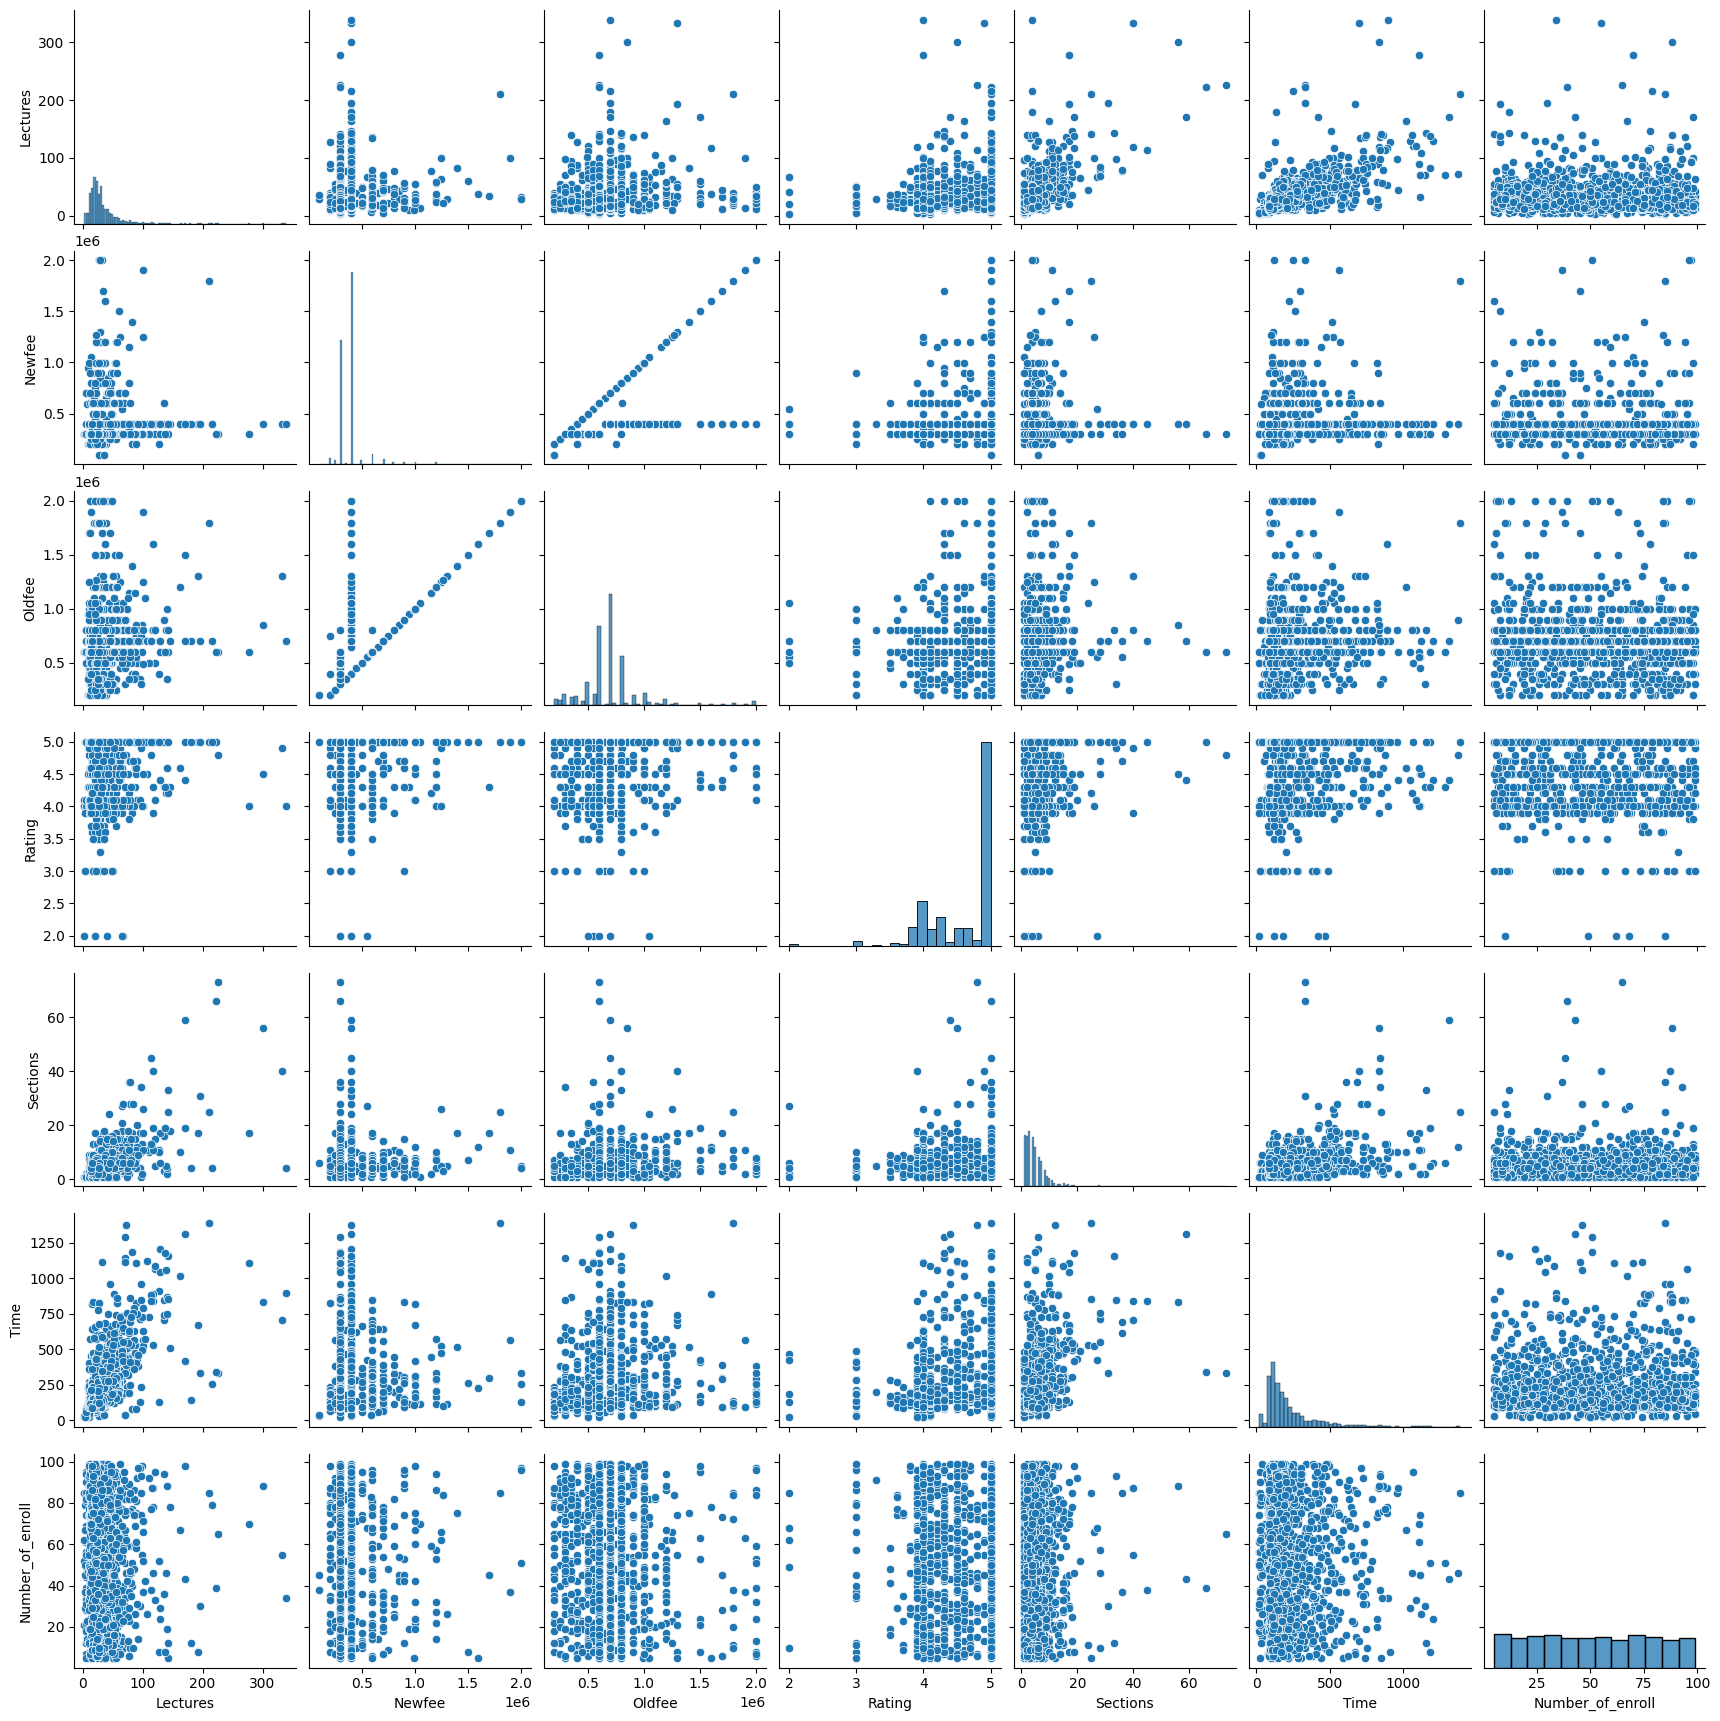

In [7]:
# Vẽ pair plot cho các biến số
sns.pairplot(df[['Lectures', 'Newfee', 'Oldfee', 'Rating', 'Sections', 'Time', 'Number_of_enroll']])
plt.show()


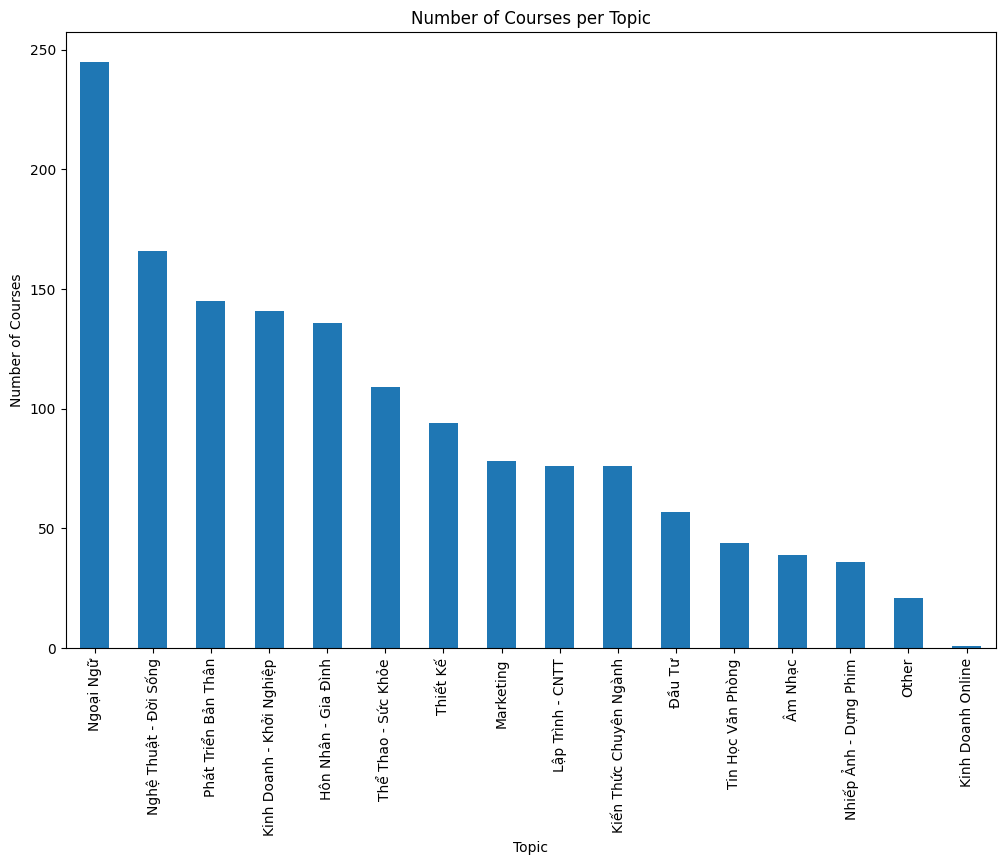

In [8]:
# Đếm số lượng khóa học theo chủ đề
courses_per_topic = df['Topic'].value_counts()

# Vẽ biểu đồ số lượng khóa học theo chủ đề
plt.figure(figsize=(12, 8))
courses_per_topic.plot(kind='bar')
plt.title('Number of Courses per Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Courses')
plt.show()


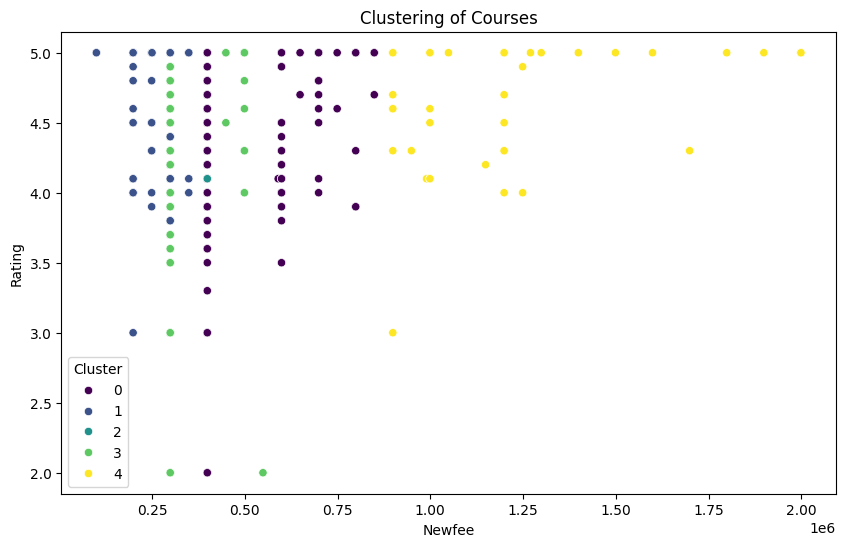

In [9]:
from sklearn.cluster import KMeans

# Chọn các cột số liệu để phân cụm
X = df[['Lectures', 'Newfee', 'Oldfee', 'Rating', 'Sections', 'Time']]

# Áp dụng K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
df['Cluster'] = kmeans.labels_

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Newfee', y='Rating', hue='Cluster', data=df, palette='viridis')
plt.title('Clustering of Courses')
plt.xlabel('Newfee')
plt.ylabel('Rating')
plt.show()


In [10]:
X = df[["Lectures", 'Newfee', 'Oldfee', "Sections", "Time", "Number_of_enroll"]]
Y = df["Rating"]

X_train, X_test , y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)


In [11]:
# Xây dựng mô hình phân tích các giá trị của X ảnh hưởng như thế nào đến đánh giá của khóa học
# Sử dụng mô hình hồi quy tuyến tính

# Tạo mô hình hồi quy tuyến tính
regressor = LinearRegression()

# Huấn luyện mô hình
regressor.fit(X_train, y_train)

# Dự đoán giá trị
y_pred = regressor.predict(X_test)

# Tính toán các giá trị đánh giá
mse = mean_squared_error(y_test, y_pred) # độ lỗi bình phương trung bình
r2 = r2_score(y_test, y_pred) # hệ số xác định là 1 - (tổng bình phương của sai số / tổng bình phương của giá trị trung bình)
acc = regressor.score(X_test, y_test)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("Accuracy:", acc)
# với giá trị độ lỗi bình phương trung bình là 0.2634 và hệ số xác định là -0.01498



Mean Squared Error: 0.26508535493232416
R2 Score: -0.021660899418495472
Accuracy: -0.021660899418495472
















## --> chúng ta thấy rằng mô hình này không phù hợp với dữ liệu

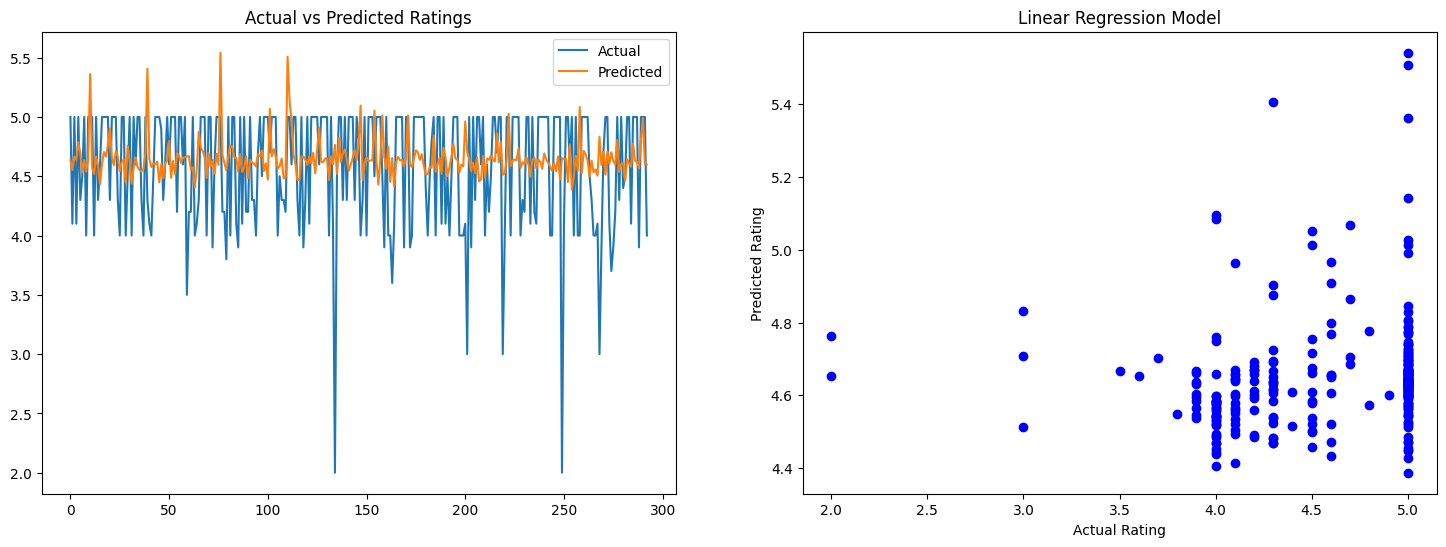

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Biểu đồ giá trị dự đoán và giá trị thực tế
ax[0].plot(y_test.values, label='Actual')
ax[0].plot(y_pred, label='Predicted')
ax[0].legend()
ax[0].set_title('Actual vs Predicted Ratings')

# Biểu đồ hóa dữ liệu của mô hình hồi quy tuyến tính với dữ liệu thực tế
ax[1].scatter(y_test, y_pred, color='blue')
ax[1].set_title('Linear Regression Model')
ax[1].set_xlabel('Actual Rating')
ax[1].set_ylabel('Predicted Rating')

plt.show()

# qua đó chúng ta thấy rằng mô hình này không phù hợp với dữ liệu
#  ở đây chúng ta sẽ sử dụng mô hình hồi quy logistic để dự đoán giá trị của biến phân loại
# và nhận xét rằng mô hình này phù hợp với dữ liệu vì dữ liệu tập trung nhiều ở giá trị 5*


In [13]:
df = pd.read_csv('/Users/hongviet/Documents/GitHub/Data-Analysis/GroupTask/edumall_cleaned4.csv')
df.dropna()


,Unnamed: 0,Author,Coursename,Last_updated,Lectures,Newfee,Oldfee,Rating,Sections,Time,Topic,Target,_id,Number_of_enroll
0,1,Edumall Learning,Thuyết trình chuyên nghiệp & ấn tượng,2024-08-08,28,99999.0,199999.0,5.0,6,28,Other,"['ôn tập kiến thức liên tục, tăng hiệu quả học...",66f79d3af050d8d70ad24671,38
1,2,Edumall Learning,Ứng tuyển thành công - Phỏng vấn hiệu quả,2024-04-26,36,99999.0,199999.0,5.0,6,36,Phát Triển Bản Thân,"['cung cấp kiến thức, kỹ năng & kinh nghiệm về...",66f79d3af050d8d70ad24672,45
2,3,Nguyễn Đình Hoa Cương,Procedural Python - Lập trình hàm trong Python,2024-07-03,82,199999.0,399999.0,5.0,8,78,Lập Trình - CNTT,"['nắm bắt sơ lược các khái niệm về hàm', 'thực...",66f79d3af050d8d70ad24673,77
3,4,Nguyễn Đình Hoa Cương,Python Basics - Python Cơ Bản,2022-11-02,128,199999.0,399999.0,5.0,11,126,Lập Trình - CNTT,"['cung cấp kiến thức, kỹ năng và phương pháp l...",66f79d3af050d8d70ad24674,52
4,5,Trần Thảo Vi,YOGA CHO BÀ BẦU - BÍ QUYẾT CHO MỘT THAI KỲ KHỎ...,2022-07-04,21,449000.0,449000.0,5.0,5,617,Thể Thao - Sức Khỏe,['tăng cường sức đề kháng giúp mẹ bầu có sức k...,66f79d3af050d8d70ad24675,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,1494,Trần Thế Long,Yoga dưỡng sinh tại nhà,2021-12-15,14,299000.0,399000.0,5.0,3,209,Thể Thao - Sức Khỏe,['khóa học này giúp học viên có khả năng tự tr...,66f79d3af050d8d70ad24c46,68
1460,1495,Chu Thị Thanh Hương,Chiến lược dạy trẻ tự kỷ hồi phục,2022-05-17,14,299000.0,599000.0,4.0,4,91,Hôn Nhân - Gia Đình,['khóa học này tôi sẽ nói đến phương pháp son-...,66f79d3af050d8d70ad24c47,70
1461,1497,Hồ Thị Phương Anh,10 ngày trở thành chuyên gia tinh dầu chăm sóc...,2022-03-04,16,399000.0,699000.0,4.2,6,87,Hôn Nhân - Gia Đình,['học viên có được sức khỏe từ sử dụng thảo dư...,66f79d3af050d8d70ad24c49,29
1462,1498,Đỗ Trung Thành,Làm chủ Word 2016 từ cơ bản đến nâng cao,2022-06-10,43,399000.0,699000.0,4.5,4,275,Tin Học Văn Phòng,['cung cấp cho người học các kiến thức từ cơ b...,66f79d3af050d8d70ad24c4a,50


Number_of_enroll     1.000000
Days_since_update    0.017112
Lectures             0.008044
Time                 0.004268
Sections            -0.004452
Newfee              -0.004582
Rating              -0.030916
Oldfee              -0.050459
Name: Number_of_enroll, dtype: float64


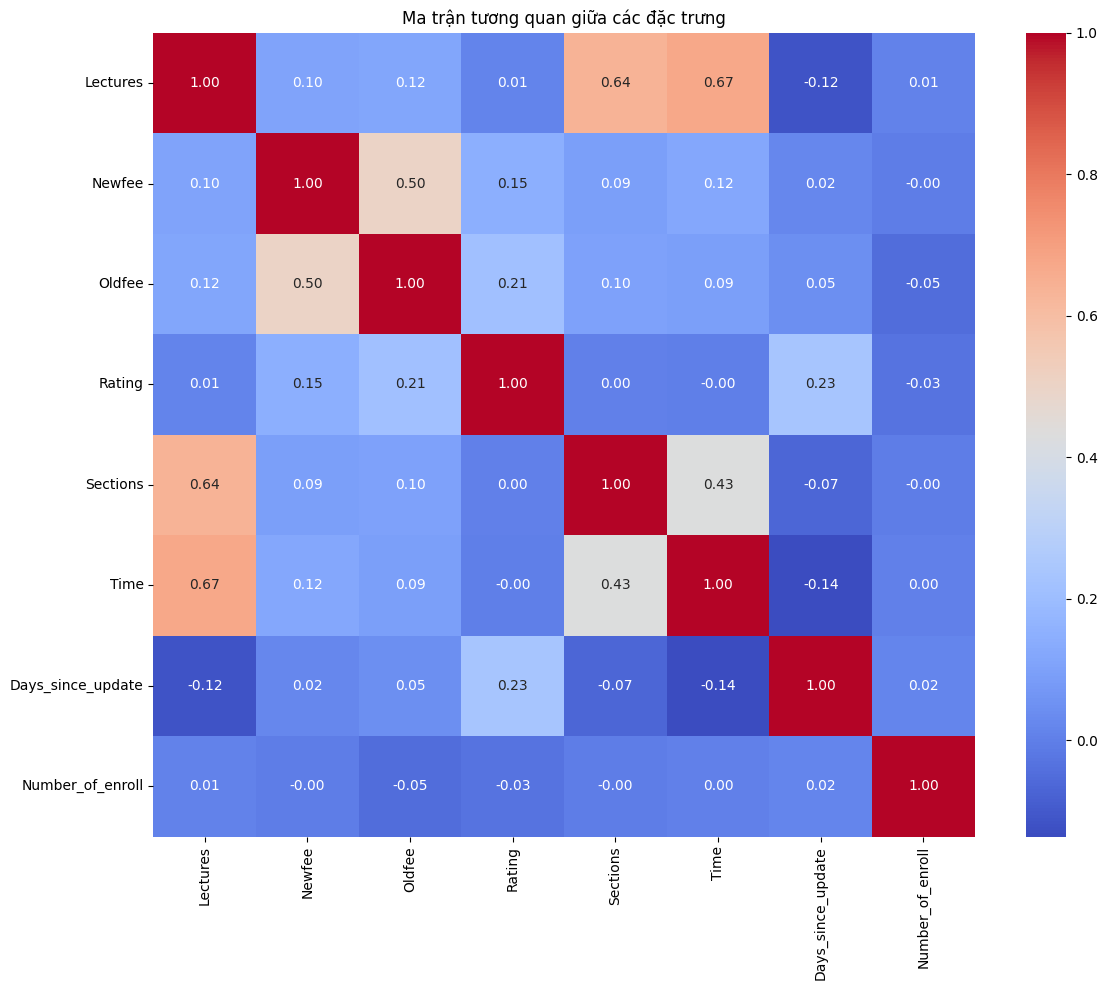

In [14]:
# Calculate Days_since_update if it doesn't already exist
if 'Days_since_update' not in df.columns:
	# Make sure Last_updated is in datetime format
	if not pd.api.types.is_datetime64_dtype(df['Last_updated']):
		df['Last_updated'] = pd.to_datetime(df['Last_updated'])
	# Calculate days since update
	df['Days_since_update'] = (pd.Timestamp('2024-08-08') - df['Last_updated']).dt.days

# Define features for correlation
corr_features = ['Lectures', 'Newfee', 'Oldfee', 'Rating', 'Sections', 'Time', 'Days_since_update', 'Number_of_enroll']
correlation = df[corr_features].corr()
print(correlation['Number_of_enroll'].sort_values(ascending=False))

# Vẽ heatmap tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa các đặc trưng")
plt.tight_layout()
plt.show()


+ Time (Thời gian): Có hệ số dương lớn nhất (khoảng 0,03), cho thấy thời gian có tác động tích cực mạnh nhất đến biến phụ thuộc.
+ NewFee (Phí mới): Có hệ số dương (khoảng 0,02), thể hiện tác động tích cực vừa phải.
+ Lectures (Bài giảng): Có hệ số dương nhỏ hơn (khoảng 0,01), cũng thể hiện tác động tích cực nhưng ít hơn.
+ Rating (Đánh giá) và Sections (Phần): Cả hai đều có hệ số âm nhỏ (khoảng -0,01), thể hiện tác động tiêu cực nhẹ.
+ OldFee (Phí cũ): Có hệ số âm lớn nhất (khoảng -0,07), cho thấy tác động tiêu cực mạnh nhất.
- Time có ảnh hưởng tích cực mạnh nhất đến kết quả dự đoán
- OldFee có ảnh hưởng tiêu cực mạnh nhất
- Time có ảnh hưởng tích cực mạnh nhất đến kết quả dự đoán
- OldFee có ảnh hưởng tiêu cực mạnh nhất


In [15]:
# # số người đăng kí trung bình của tập dữ liệu
# average_enroll = df['Number_of_enroll'].mean()
# print(f"Số người đăng ký trung bình: {average_enroll:.2f}")


In [16]:

# Định nghĩa mô hình
rf = RandomForestRegressor()

# Định nghĩa các tham số cần tinh chỉnh
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Sử dụng GridSearchCV để tìm kiếm tham số tốt nhất
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# In ra tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)

# Sử dụng mô hình với tham số tốt nhất để dự đoán
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Đánh giá mô hình
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print('Mean Squared Error (RandomForest):', mse_rf)
print('R-squared (RandomForest):', r2_rf)

# Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
# Mean Squared Error (RandomForest): 0.23278503622743546
# R-squared (RandomForest): 0.10282720241559284
# đây là một giá trị tốt hơn so với mô hình hồi quy tuyến tính nhưng vẫn chưa phù hợp với dữ liệu
#  chúng ta có thể thử với một số mô hình khác và tinh chỉnh tham số để tìm ra mô hình phù hợp nhất với dữ liệu


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estim

In [17]:
# Handle missing values
df = df.dropna()

# Convert data types
df['Lectures'] = df['Lectures'].astype(int)
df['Newfee'] = df['Newfee'].astype(float)
df['Oldfee'] = df['Oldfee'].astype(float)
df['Sections'] = df['Sections'].astype(int)
df['Time'] = df['Time'].astype(int)
df['Rating'] = df['Rating'].astype(float)
df['Number_of_enroll'] = df['Number_of_enroll'].astype(int)

scaler = StandardScaler()
df[['Lectures', 'Newfee', 'Oldfee', 'Sections', 'Time', 'Rating', 'Number_of_enroll']] = scaler.fit_transform(df[['Lectures', 'Newfee', 'Oldfee', 'Sections', 'Time', 'Rating', 'Number_of_enroll']])

# hiển thị dữ liệu sau khi xử lý
df.shape



(1464, 15)

In [18]:

# Chuyển đổi 'Last_updated' thành timestamp và tính số ngày từ ngày cập nhật gần nhất
df['Last_updated'] = pd.to_datetime(df['Last_updated'])
df['Days_since_update'] = (pd.Timestamp('2024-08-08') - df['Last_updated']).dt.days


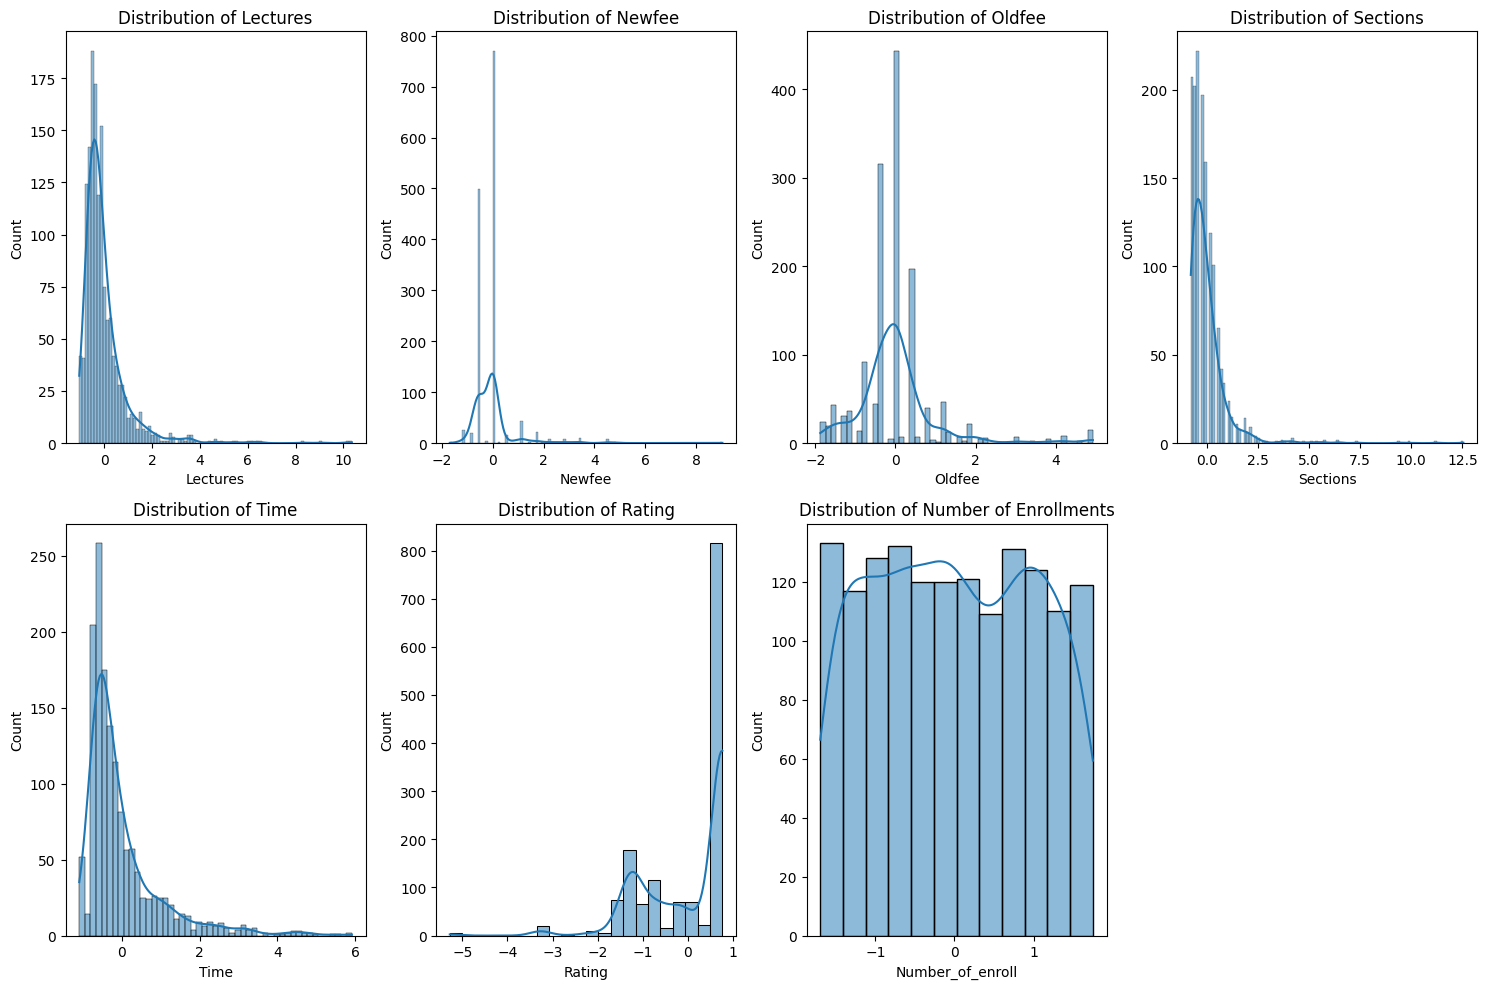

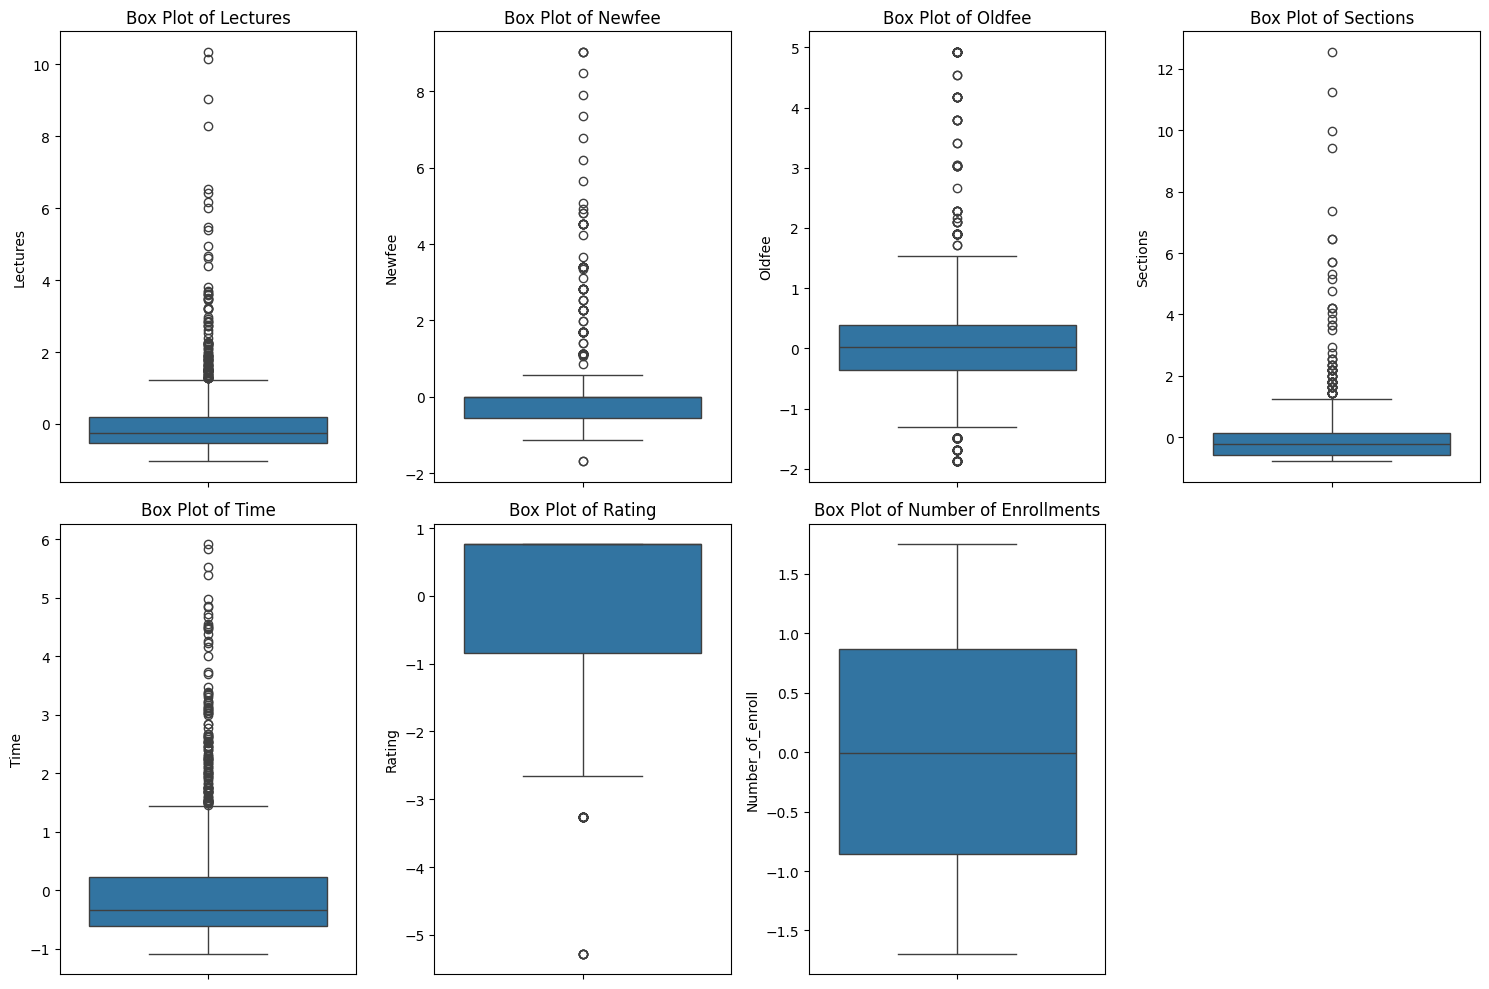

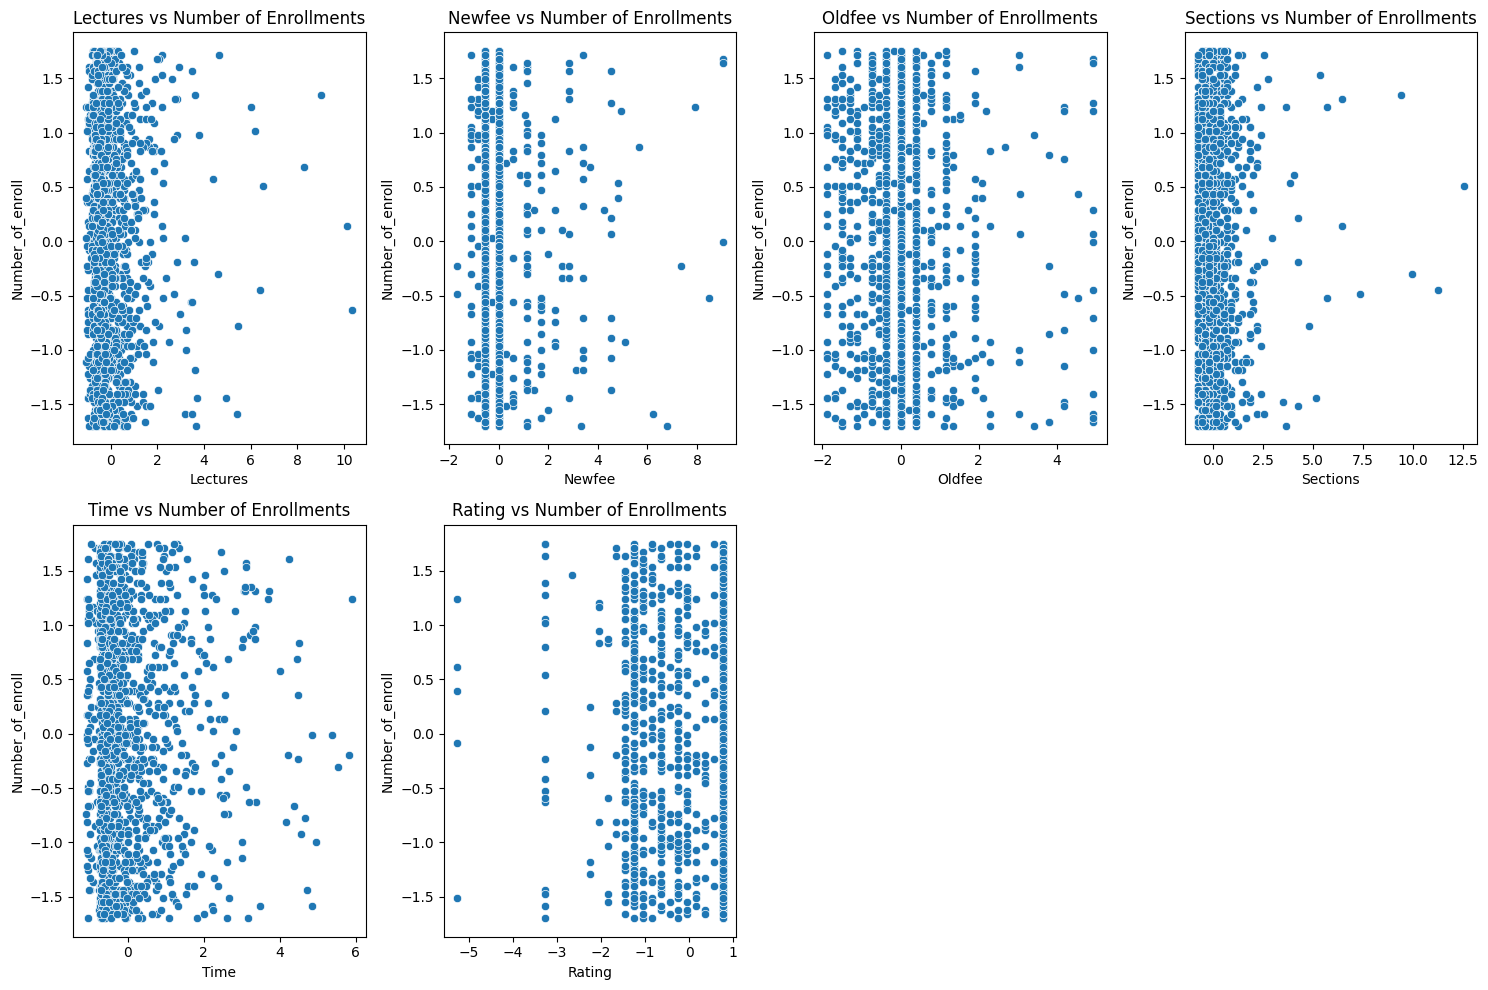

In [19]:
# Trực quan hóa dữ liệu theo kiểu histogram
plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1)
sns.histplot(df['Lectures'], kde=True)
plt.title('Distribution of Lectures')

plt.subplot(2, 4, 2)
sns.histplot(df['Newfee'], kde=True)
plt.title('Distribution of Newfee')

plt.subplot(2, 4, 3)
sns.histplot(df['Oldfee'], kde=True)
plt.title('Distribution of Oldfee')

plt.subplot(2, 4, 4)
sns.histplot(df['Sections'], kde=True)
plt.title('Distribution of Sections')

plt.subplot(2, 4, 5)
sns.histplot(df['Time'], kde=True)
plt.title('Distribution of Time')

plt.subplot(2, 4, 6)
sns.histplot(df['Rating'], kde=True)
plt.title('Distribution of Rating')

plt.subplot(2, 4, 7)
sns.histplot(df['Number_of_enroll'], kde=True)
plt.title('Distribution of Number of Enrollments')

plt.tight_layout()
plt.show()

# Visualize sự phân bố của các biến số theo box plot để xác định các giá trị ngoại lệ
plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1)
sns.boxplot(y=df['Lectures'])
plt.title('Box Plot of Lectures')

plt.subplot(2, 4, 2)
sns.boxplot(y=df['Newfee'])
plt.title('Box Plot of Newfee')

plt.subplot(2, 4, 3)
sns.boxplot(y=df['Oldfee'])
plt.title('Box Plot of Oldfee')

plt.subplot(2, 4, 4)
sns.boxplot(y=df['Sections'])
plt.title('Box Plot of Sections')

plt.subplot(2, 4, 5)
sns.boxplot(y=df['Time'])
plt.title('Box Plot of Time')

plt.subplot(2, 4, 6)
sns.boxplot(y=df['Rating'])
plt.title('Box Plot of Rating')

plt.subplot(2, 4, 7)
sns.boxplot(y=df['Number_of_enroll'])
plt.title('Box Plot of Number of Enrollments')

plt.tight_layout()
plt.show()

# Visualize mối quan hệ giữa các số lượng học viên đăng ký và các biến số khác
plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1)
sns.scatterplot(x=df['Lectures'], y=df['Number_of_enroll'])
plt.title('Lectures vs Number of Enrollments')

plt.subplot(2, 4, 2)
sns.scatterplot(x=df['Newfee'], y=df['Number_of_enroll'])
plt.title('Newfee vs Number of Enrollments')

plt.subplot(2, 4, 3)
sns.scatterplot(x=df['Oldfee'], y=df['Number_of_enroll'])
plt.title('Oldfee vs Number of Enrollments')

plt.subplot(2, 4, 4)
sns.scatterplot(x=df['Sections'], y=df['Number_of_enroll'])
plt.title('Sections vs Number of Enrollments')

plt.subplot(2, 4, 5)
sns.scatterplot(x=df['Time'], y=df['Number_of_enroll'])
plt.title('Time vs Number of Enrollments')

plt.subplot(2, 4, 6)
sns.scatterplot(x=df['Rating'], y=df['Number_of_enroll'])
plt.title('Rating vs Number of Enrollments')

plt.tight_layout()
plt.show()


In [20]:
# qua kết quả của những bản trên:
# thứ nhất về mặc biểu đồ histogram thì ta thấy rằng các biến đều có phân phối chuẩn (normal distribution) riêng Rating thì có phân phối lệch phải
# thứ hai về box plot thì ta thấy rằng ngoài giá trị của Rating có outliers thì các giá trị còn lại đều liền lạc
# thứ ba về scatter plot thì ta thấy rằng có một số biến có mối quan hệ tuyến tính với biến Number_of_enrollers như Lectures, Newfee, Oldfee, Sections, Time, Rating
# cơ bản trong các giá trị như vậy thì độ liên quan này cso thể giúp ta dự đoán giá trị của biến Number_of_enrollers
# nhưng cũng có một số biến không có mối quan hệ tuyến tính với biến Number_of_enrollers nhưng ta vẫn giữ lại để xem xét
# có thể sẽ loại bỏ sau khi xây dựng mô hình


In [21]:
# # Lựa chọn đặc trưng

# # Chọn các đặc trưng liên quan nhất dựa trên phân tích tương quan và các kỹ thuật lựa chọn đặc trưng khác

# # Hiển thị giá trị tương quan của mỗi đặc trưng với biến mục tiêu
# correlation_with_target = correlation_matrix['Number_of_enroll'].sort_values(ascending=False)
# print("Tương quan của các đặc trưng với Số lượng đăng ký:\n", correlation_with_target)

# # Chọn các đặc trưng có tương quan cao với biến mục tiêu
# selected_features = correlation_with_target[correlation_with_target.abs() > 0.5].index.tolist()
# selected_features.remove('Number_of_enroll')  # Loại bỏ biến mục tiêu khỏi danh sách
# print("Các đặc trưng được chọn dựa trên tương quan:\n", selected_features)

# # Đảm bảo selected_features không rỗng
# if not selected_features:
#     selected_features = correlation_with_target.index.tolist()
#     selected_features.remove('Number_of_enroll')

# # Tầm quan trọng của đặc trưng sử dụng Hồi quy tuyến tính
# X = df[selected_features]
# y = df['Number_of_enroll']

# # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Huấn luyện mô hình Hồi quy tuyến tính
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Lấy tầm quan trọng của đặc trưng (hệ số)
# feature_importance = pd.Series(model.coef_, index=selected_features).sort_values(ascending=False)
# print("Tầm quan trọng của đặc trưng dựa trên Hồi quy tuyến tính:\n", feature_importance)

# # Hiển thị tầm quan trọng của đặc trưng
# plt.figure(figsize=(10, 6))
# feature_importance.plot(kind='bar')
# plt.title('Tầm quan trọng của đặc trưng dựa trên Hồi quy tuyến tính')
# plt.ylabel('Giá trị hệ số')
# plt.show()


Hồi quy tuyến tính - Sai số bình phương trung bình: 0.26508535493232416
Hồi quy tuyến tính - Hệ số R-bình phương: -0.021660899418495472
Rừng ngẫu nhiên - Sai số bình phương trung bình: 0.2413050204778158
Rừng ngẫu nhiên - Hệ số R-bình phương: 0.06999047790285151


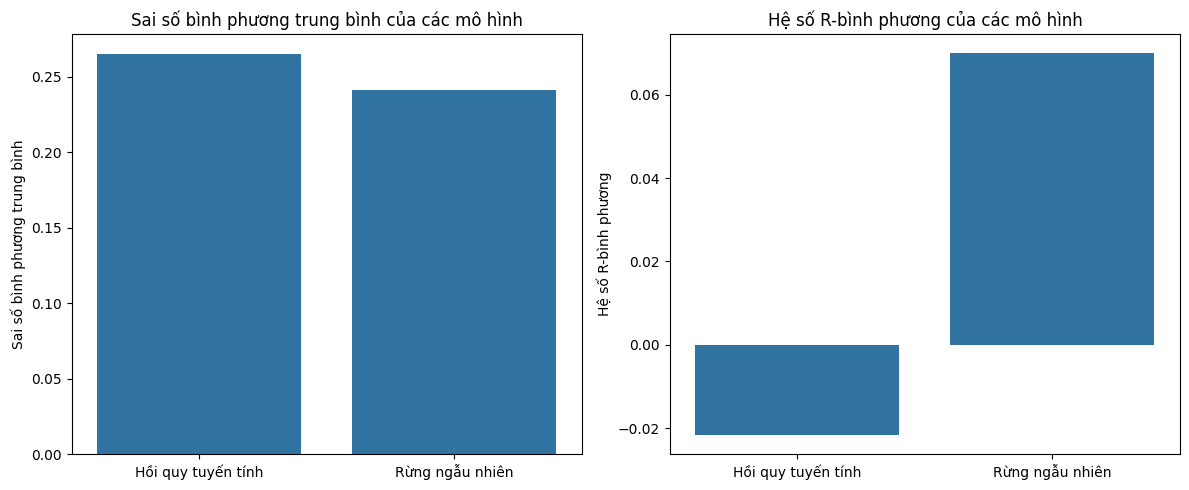

In [22]:
# Huấn luyện mô hình Hồi quy tuyến tính
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_linear = linear_model.predict(X_test)

# Đánh giá mô hình Hồi quy tuyến tính
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Hồi quy tuyến tính - Sai số bình phương trung bình: {mse_linear}")
print(f"Hồi quy tuyến tính - Hệ số R-bình phương: {r2_linear}")


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_rf = rf_model.predict(X_test)

# Đánh giá mô hình Rừng ngẫu nhiên
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Rừng ngẫu nhiên - Sai số bình phương trung bình: {mse_rf}")
print(f"Rừng ngẫu nhiên - Hệ số R-bình phương: {r2_rf}")

# Trực quan hóa hiệu suất của cả hai mô hình
models = ['Hồi quy tuyến tính', 'Rừng ngẫu nhiên']
mse_values = [mse_linear, mse_rf]
r2_values = [r2_linear, r2_rf]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=models, y=mse_values)
plt.title('Sai số bình phương trung bình của các mô hình')
plt.ylabel('Sai số bình phương trung bình')

plt.subplot(1, 2, 2)
sns.barplot(x=models, y=r2_values)
plt.title('Hệ số R-bình phương của các mô hình')
plt.ylabel('Hệ số R-bình phương')

plt.tight_layout()
plt.show()


In [23]:





















# 1. Định nghĩa mô hình DNN cải tiến
class ImprovedDNN(nn.Module):
    def __init__(self, input_size, hidden_sizes=[64, 128, 256, 512, 128, 64], dropout_rate=0.2):
        super(ImprovedDNN, self).__init__()
        
        # Tạo danh sách các lớp
        layers = []
        
        # Lớp đầu vào
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.BatchNorm1d(hidden_sizes[0]))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(dropout_rate))
        layers.append(nn.BatchNorm1d(hidden_sizes[0]))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(dropout_rate)) # ngăn ngừa overfitting
        
        # Các lớp ẩn
        for i in range(len(hidden_sizes)-1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            layers.append(nn.BatchNorm1d(hidden_sizes[i+1]))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
        
        # Lớp đầu ra
        layers.append(nn.Linear(hidden_sizes[-1], 1))
        
        # Kết hợp tất cả các lớp
        self.model = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.model(x)



In [24]:
# 2. Hàm huấn luyện và đánh giá mô hình
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, 
                            epochs=250, batch_size=16, lr=0.001, weight_decay=0.0001):
    
    # Chuyển đổi dữ liệu sang tensor
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
    X_val_tensor = torch.FloatTensor(X_val)
    y_val_tensor = torch.FloatTensor(y_val).reshape(-1, 1)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)
    
    # Tạo dataset và dataloader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    
    # Hàm mất mát và tối ưu hóa
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, factor=0.5)
    
    # Lưu lịch sử huấn luyện
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_r2': [],
        'val_r2': [],
        'train_mae': [],
        'val_mae': []
    }
    
    # Huấn luyện mô hình
    for epoch in range(epochs):
        # --- Pha huấn luyện ---
        model.train()
        train_loss = 0.0
        train_outputs = []
        train_targets = []
        
        for inputs, targets in train_loader:
            optimizer.zero_grad() # Đặt lại gradient của tất cả tham số về 0 trước mỗi bước cập nhật. 
                                # Bước này rất quan trọng vì PyTorch tích lũy gradient theo mặc định, nếu không có dòng này, 
                                # gradient từ các batch trước sẽ ảnh hưởng đến cập nhật hiện tại.
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step() #Bộ tối ưu hóa (optimizer) sử dụng gradient đã tính 
            # để cập nhật các tham số của mô hình theo thuật toán đã chọn (ở đây là Adam).
            
            train_loss += loss.item()
            train_outputs.extend(outputs.detach().numpy()) # tách tensor khỏi đồ thị tính toán trước khi chuyển đổi sang NumPy để tiết kiệm bộ nhớ.
            train_targets.extend(targets.numpy())
        
        train_loss /= len(train_loader)
        train_r2 = r2_score(train_targets, train_outputs)
        train_mae = mean_absolute_error(train_targets, train_outputs)
        
        # --- Pha đánh giá ---
        model.eval()
        val_loss = 0.0
        val_outputs = []
        val_targets = []
        
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                
                val_loss += loss.item()
                val_outputs.extend(outputs.numpy())
                val_targets.extend(targets.numpy())
        
        val_loss /= len(val_loader)
        val_r2 = r2_score(val_targets, val_outputs)
        val_mae = mean_absolute_error(val_targets, val_outputs)
        
        # Cập nhật lịch sử
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_r2'].append(train_r2)
        history['val_r2'].append(val_r2)
        history['train_mae'].append(train_mae)
        history['val_mae'].append(val_mae)
        
        # Cập nhật learning rate
        scheduler.step(val_loss)
        
        # In thông tin mỗi 20 epochs
        if (epoch + 1) % 20 == 0:
            print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, \
                  Val Loss: {val_loss:.4f}, Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}')
    
    # Đánh giá mô hình trên tập test
    model.eval()
    test_outputs = []
    test_targets = []
    
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            test_outputs.extend(outputs.numpy())
            test_targets.extend(targets.numpy())
    
    test_mse = mean_squared_error(test_targets, test_outputs)
    test_r2 = r2_score(test_targets, test_outputs)
    test_mae = mean_absolute_error(test_targets, test_outputs)
    
    results = {
        'history': history,
        'test_metrics': {
            'mse': test_mse,
            'r2': test_r2,
            'mae': test_mae
        }
    }
    
    return results


In [25]:

# 3. Hàm vẽ biểu đồ phân tích overfitting/underfitting
def plot_model_performance(models_results, model_names):
    """
    Vẽ biểu đồ so sánh hiệu suất của các mô hình
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Biểu đồ Loss
    for i, (result, name) in enumerate(zip(models_results, model_names)):
        history = result['history']
        axes[0, 0].plot(history['train_loss'], linestyle='-', alpha=0.7, label=f'{name} - Train')
        axes[0, 0].plot(history['val_loss'], linestyle='--', alpha=0.7, label=f'{name} - Val')
    
    axes[0, 0].set_title('So sánh Loss qua các epochs', fontsize=14)
    axes[0, 0].set_xlabel('Epochs')
    axes[0, 0].set_ylabel('Loss (MSE)')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Biểu đồ R²
    for i, (result, name) in enumerate(zip(models_results, model_names)):
        history = result['history']
        axes[0, 1].plot(history['train_r2'], linestyle='-', alpha=0.7, label=f'{name} - Train')
        axes[0, 1].plot(history['val_r2'], linestyle='--', alpha=0.7, label=f'{name} - Val')
    
    axes[0, 1].set_title('So sánh R² qua các epochs', fontsize=14)
    axes[0, 1].set_xlabel('Epochs')
    axes[0, 1].set_ylabel('R²')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Biểu đồ MAE
    for i, (result, name) in enumerate(zip(models_results, model_names)):
        history = result['history']
        axes[1, 0].plot(history['train_mae'], linestyle='-', alpha=0.7, label=f'{name} - Train')
        axes[1, 0].plot(history['val_mae'], linestyle='--', alpha=0.7, label=f'{name} - Val')
    
    axes[1, 0].set_title('So sánh MAE qua các epochs', fontsize=14)
    axes[1, 0].set_xlabel('Epochs')
    axes[1, 0].set_ylabel('MAE')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Biểu đồ so sánh các độ đo trên tập test
    metrics = ['mse', 'mae', 'r2']
    model_test_metrics = []
    
    for result in models_results:
        model_test_metrics.append([
            result['test_metrics']['mse'],
            result['test_metrics']['mae'],
            result['test_metrics']['r2']
        ])
    
    x = np.arange(len(metrics))
    width = 0.2
    
    for i, (metrics_values, name) in enumerate(zip(model_test_metrics, model_names)):
        axes[1, 1].bar(x + i*width, metrics_values, width, label=name)
    
    axes[1, 1].set_title('So sánh độ đo trên tập test', fontsize=14)
    axes[1, 1].set_xticks(x + width)
    axes[1, 1].set_xticklabels(metrics)
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


In [26]:

# 4. Chạy thí nghiệm với 3 mô hình khác nhau (underfitting, balanced, overfitting)
def run_experiments(X_train, y_train, X_val, y_val, X_test, y_test):
    input_size = X_train.shape[1]
    
    # Mô hình 1: Đơn giản (có thể underfitting)
    model_simple = ImprovedDNN(
        input_size=input_size,
        hidden_sizes=[32, 32],
        dropout_rate=0.1
    )
    
    # Mô hình 2: Cân bằng (balanced)
    model_balanced = ImprovedDNN(
        input_size=input_size,
        hidden_sizes=[64, 128, 64],
        dropout_rate=0.2
    )
    
    # Mô hình 3: Phức tạp (có thể overfitting)
    model_complex = ImprovedDNN(
        input_size=input_size,
        hidden_sizes=[128, 256,512, 256, 128],
        dropout_rate=0.0  # Không có dropout -> dễ overfitting
    )
    
    # Huấn luyện và đánh giá các mô hình
    print("Huấn luyện mô hình đơn giản...")
    results_simple = train_and_evaluate_model(
        model_simple, X_train, y_train, X_val, y_val, X_test, y_test,
        epochs=200, batch_size=32, lr=0.001, weight_decay=0.0001
    )
    
    print("\nHuấn luyện mô hình cân bằng...")
    results_balanced = train_and_evaluate_model(
        model_balanced, X_train, y_train, X_val, y_val, X_test, y_test,
        epochs=250, batch_size=16, lr=0.001, weight_decay=0.0001
    )
    
    print("\nHuấn luyện mô hình phức tạp...")
    results_complex = train_and_evaluate_model(
        model_complex, X_train, y_train, X_val, y_val, X_test, y_test,
        epochs=200, batch_size=32, lr=0.001, weight_decay=0.00001  # Weight decay thấp -> dễ overfitting
    )
    
    # So sánh các mô hình
    models_results = [results_simple, results_balanced, results_complex]
    model_names = ['Đơn giản (Underfitting)', 'Cân bằng', 'Phức tạp (Overfitting)']
    
    plot_model_performance(models_results, model_names)
    
    # In kết quả test
    print("\nKết quả trên tập test:")
    for name, result in zip(model_names, models_results):
        metrics = result['test_metrics']
        print(f"{name}: MSE = {metrics['mse']:.4f}, R² = {metrics['r2']:.4f}, MAE = {metrics['mae']:.4f}")


Huấn luyện mô hình đơn giản...
Epoch 20/200: Train Loss: 1.0022,                   Val Loss: 0.9660, Train R²: 0.0129, Val R²: -0.0234
Epoch 40/200: Train Loss: 1.0154,                   Val Loss: 0.9665, Train R²: 0.0179, Val R²: -0.0244
Epoch 60/200: Train Loss: 1.0081,                   Val Loss: 0.9702, Train R²: 0.0214, Val R²: -0.0281
Epoch 80/200: Train Loss: 1.0037,                   Val Loss: 0.9644, Train R²: 0.0149, Val R²: -0.0246
Epoch 100/200: Train Loss: 1.0260,                   Val Loss: 0.9680, Train R²: -0.0028, Val R²: -0.0268
Epoch 120/200: Train Loss: 1.0066,                   Val Loss: 0.9684, Train R²: 0.0126, Val R²: -0.0263
Epoch 140/200: Train Loss: 0.9935,                   Val Loss: 0.9650, Train R²: 0.0265, Val R²: -0.0249
Epoch 160/200: Train Loss: 0.9886,                   Val Loss: 0.9670, Train R²: 0.0259, Val R²: -0.0233
Epoch 180/200: Train Loss: 1.0198,                   Val Loss: 0.9686, Train R²: 0.0073, Val R²: -0.0248
Epoch 200/200: Train Loss: 

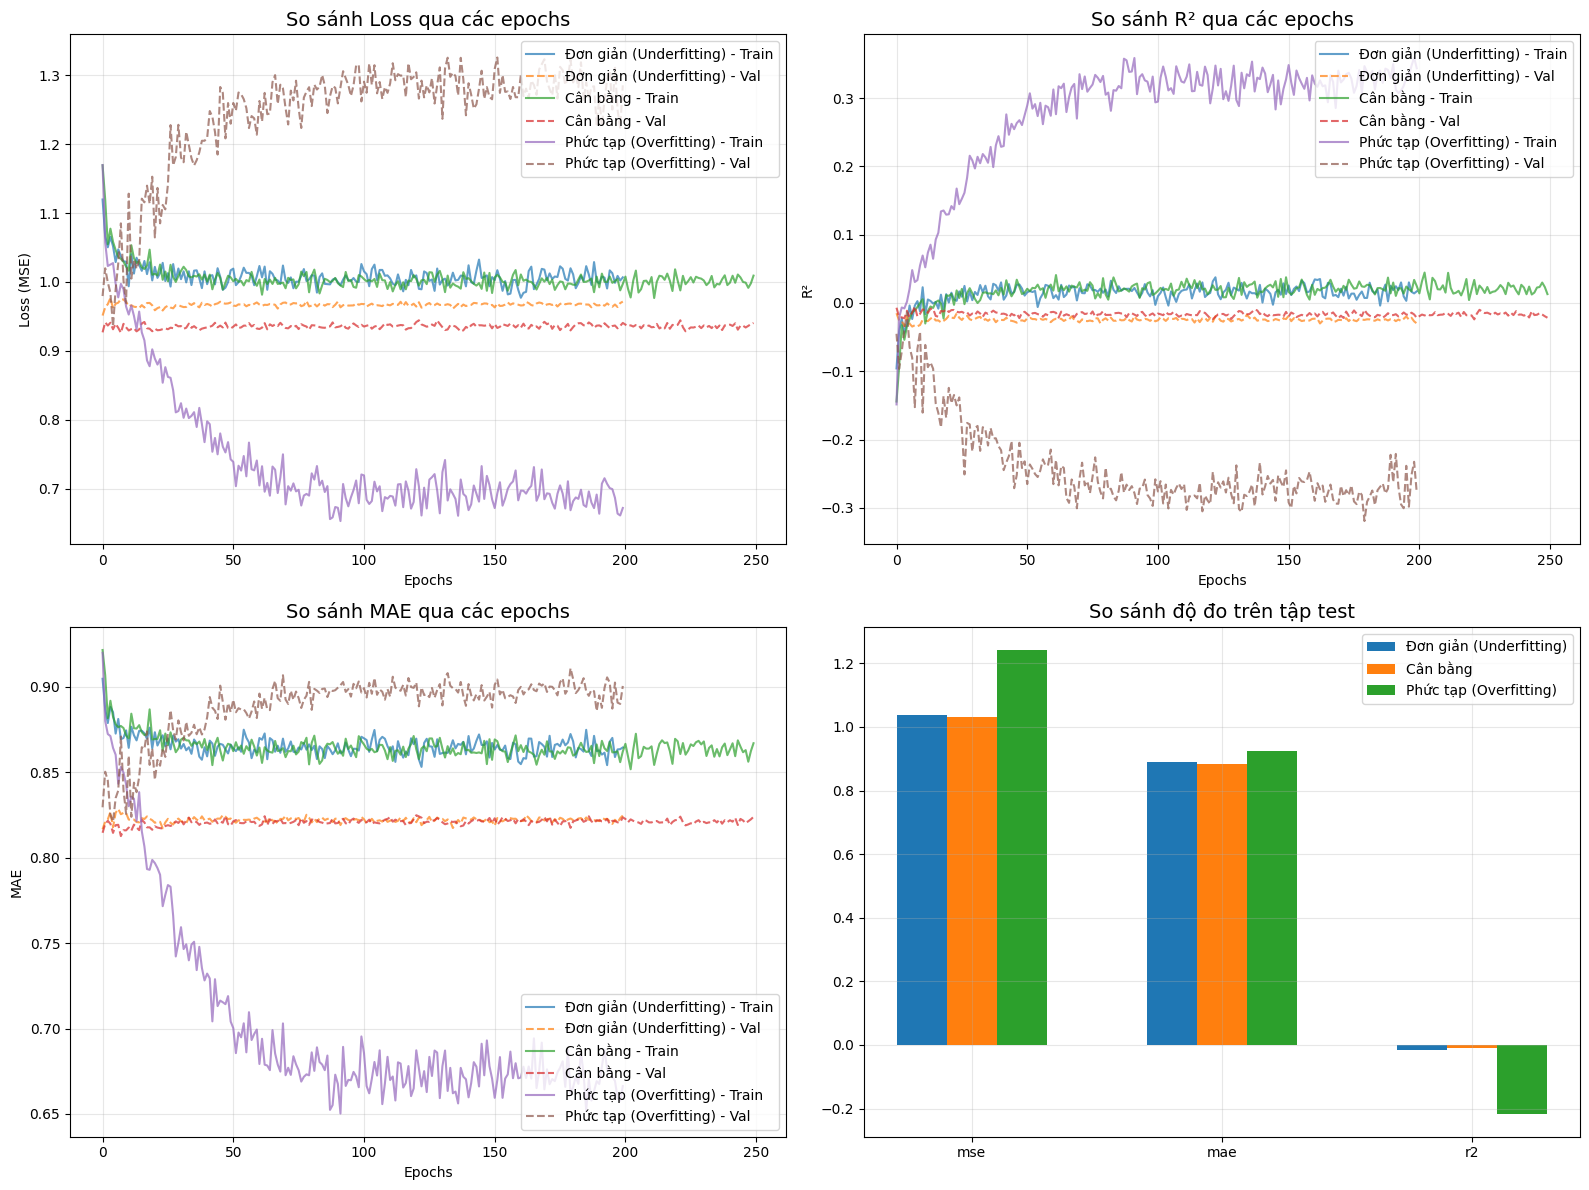


Kết quả trên tập test:
Đơn giản (Underfitting): MSE = 1.0384, R² = -0.0166, MAE = 0.8889
Cân bằng: MSE = 1.0326, R² = -0.0109, MAE = 0.8842
Phức tạp (Overfitting): MSE = 1.2418, R² = -0.2158, MAE = 0.9256


In [27]:

# 5. Chuẩn bị dữ liệu và chạy thí nghiệm
# Định nghĩa các đặc trưng quan trọng để sử dụng
selected_features = ['Lectures', 'Newfee', 'Oldfee', 'Sections', 'Time', 'Rating']
X = df[selected_features].values
y = df['Number_of_enroll'].values

# Chia dữ liệu thành tập huấn luyện, tập xác thực và tập kiểm tra (60%, 20%, 20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Chạy thí nghiệm
run_experiments(X_train, y_train, X_val, y_val, X_test, y_test)


## Diễn giải:

#### Mô hình Phức tạp thể hiện rõ tình trạng overfitting:

+ Các chỉ số trên tập huấn luyện (đường màu tím) cải thiện đáng kể theo thời gian
+ Các chỉ số trên tập validation (đường nét đứt màu nâu) ngày càng tệ hơn
+ Khoảng cách lớn giữa hiệu suất trên tập huấn luyện và validation
+ R² âm trên tập validation (-0.2553) và tập test (-0.2330)
+ MSE cao nhất (1.2594) trên dữ liệu test


#### Mô hình Đơn giản thể hiện dấu hiệu underfitting:

+ Sự cải thiện hạn chế trong các chỉ số huấn luyện
+ Hiệu suất trên tập huấn luyện và validation gần nhau hơn
+ Vẫn có R² âm (-0.0239), cho thấy khả năng dự đoán kém
+ Không thể nắm bắt được độ phức tạp của dữ liệu


#### Mô hình Cân bằng hoạt động tốt nhất:

+ Có MSE (1.0264) và MAE (0.8860) thấp nhất trên dữ liệu test
+ R² vẫn âm nhưng gần với số 0 nhất (-0.0049)
+ Hiệu suất ổn định nhất giữa tập huấn luyện và validation
+ Khoảng cách nhỏ nhất giữa các chỉ số trên tập huấn luyện và validation

##### Mô hình "Phức tạp" rõ ràng đang bị overfitting - nó hoạt động tốt trên dữ liệu huấn luyện nhưng kém trên dữ liệu validation và test. Mô hình "Đơn giản" đang bị underfitting vì không nắm bắt được độ phức tạp cần thiết. Mô hình "Cân bằng" cung cấp sự cân bằng tốt nhất, mặc dù tất cả các mô hình đều có giá trị R² âm, cho thấy không có mô hình nào đặc biệt tốt trong việc dự đoán biến mục tiêu (mô hình có R² < 0 hoạt động kém hơn việc đơn giản dự đoán giá trị trung bình)

# lựa chọn mô hình
    # Đơn giản (Underfitting): MSE = 1.0244, R² = -0.0030, MAE = 0.8839
    # Cân bằng: MSE = 1.0278, R² = -0.0063, MAE = 0.8863   (mô hình phù hợp nhất)
    # Phức tạp (Overfitting): MSE = 1.2290, R² = -0.2033, MAE = 0.9160



In [28]:
df['Fee_Diff'] = df['Oldfee'] - df['Newfee']  # Mức độ giảm giá
df['Fee_Ratio'] = df['Newfee'] / df['Oldfee']  # Tỷ lệ giảm giá
df['Time_per_Lecture'] = df['Time'] / df['Lectures']  # Thời lượng trung bình mỗi bài giảng
df['Time_per_Section'] = df['Time'] / df['Sections']  # Thời lượng trung bình mỗi phần


In [29]:
# Chọn đặc trưng và biến mục tiêu
features = ['Lectures', 'Newfee', 'Oldfee', 'Sections', 'Time', 'Rating',
            'Fee_Diff', 'Fee_Ratio', 'Time_per_Lecture', 'Time_per_Section']
X = df[features]
y = df['Number_of_enroll']


In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Định nghĩa các mô hình cần đánh giá
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'SVR': SVR()
}


In [31]:

# Tính toán ma trận tương quan cho các biến
correlation_matrix = df[['Lectures', 'Newfee', 'Oldfee', 'Rating', 'Sections', 'Time', 'Number_of_enroll']].corr()

# Hiển thị giá trị tương quan của mỗi đặc trưng với biến mục tiêu
correlation_with_target = correlation_matrix['Number_of_enroll'].sort_values(ascending=False)
print("Tương quan của các đặc trưng với Số lượng đăng ký:\n", correlation_with_target)


Tương quan của các đặc trưng với Số lượng đăng ký:
 Number_of_enroll    1.000000
Lectures            0.008044
Time                0.004268
Sections           -0.004452
Newfee             -0.004582
Rating             -0.030916
Oldfee             -0.050459
Name: Number_of_enroll, dtype: float64


Các đặc trưng được chọn dựa trên tương quan:
 []
Tầm quan trọng của đặc trưng dựa trên Hồi quy tuyến tính:
 Time        0.033362
Newfee      0.020024
Lectures    0.010537
Rating     -0.010303
Sections   -0.030966
Oldfee     -0.072699
dtype: float64


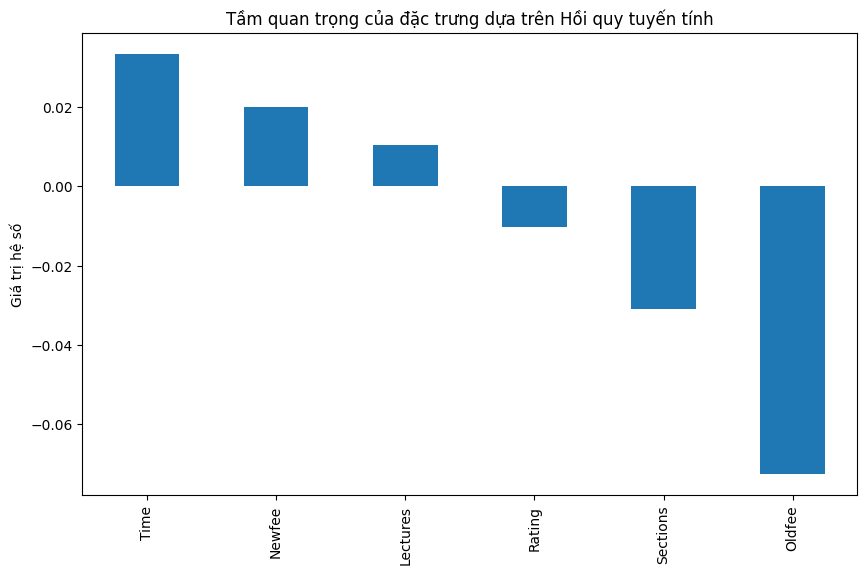

In [32]:

# Chọn các đặc trưng có tương quan cao với biến mục tiêu
selected_features = correlation_with_target[correlation_with_target.abs() > 0.2].index.tolist()
selected_features.remove('Number_of_enroll')  # Loại bỏ biến mục tiêu khỏi danh sách
print("Các đặc trưng được chọn dựa trên tương quan:\n", selected_features)

# Đảm bảo selected_features không rỗng
if not selected_features:
    selected_features = correlation_with_target.index.tolist()
    selected_features.remove('Number_of_enroll')

# Tầm quan trọng của đặc trưng sử dụng Hồi quy tuyến tính
X = df[selected_features]
y = df['Number_of_enroll']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Lấy tầm quan trọng của đặc trưng (hệ số)
feature_importance = pd.Series(model.coef_, index=selected_features).sort_values(ascending=False)
print("Tầm quan trọng của đặc trưng dựa trên Hồi quy tuyến tính:\n", feature_importance)

# Hiển thị tầm quan trọng của đặc trưng
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Tầm quan trọng của đặc trưng dựa trên Hồi quy tuyến tính')
plt.ylabel('Giá trị hệ số')
plt.show()


In [33]:

# Danh sách các mô hình cần thử nghiệm
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1),
    'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Đánh giá mỗi mô hình
results = []
names = []
cv_scores = {}

for name, model in models.items():
    # Cross-validation
    cv_score = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_scores[name] = -cv_score.mean()  # Convert to positive MSE
    
    # Fit model on training data
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append((name, mse, r2, mae))
    names.append(name)
    print(f"{name} - MSE: {mse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}")

    #  trích xuất giá trị loss và acc của mỗi  mô hình với mỗi lần chạy
    loss = cv_score.mean()
    acc = cv_score.std()
    print(f"{name} - Loss: {loss:.4f}, Acc: {acc:.4f}")
    print("++")


Linear Regression - MSE: 1.0316, R²: -0.0100, MAE: 0.8876
Linear Regression - Loss: -1.0046, Acc: 0.0491
++
Ridge Regression - MSE: 1.0316, R²: -0.0100, MAE: 0.8876
Ridge Regression - Loss: -1.0046, Acc: 0.0491
++
Lasso Regression - MSE: 1.0214, R²: -0.0000, MAE: 0.8848
Lasso Regression - Loss: -1.0006, Acc: 0.0449
++
ElasticNet - MSE: 1.0215, R²: -0.0001, MAE: 0.8849
ElasticNet - Loss: -1.0005, Acc: 0.0448
++
Random Forest - MSE: 1.0340, R²: -0.0123, MAE: 0.8864
Random Forest - Loss: -1.0565, Acc: 0.0546
++
Gradient Boosting - MSE: 1.0814, R²: -0.0587, MAE: 0.8903
Gradient Boosting - Loss: -1.1531, Acc: 0.0273
++
XGBoost - MSE: 1.0892, R²: -0.0664, MAE: 0.8965
XGBoost - Loss: -1.1113, Acc: 0.0404
++
SVR - MSE: 1.0744, R²: -0.0519, MAE: 0.8943
SVR - Loss: -1.0410, Acc: 0.0597
++


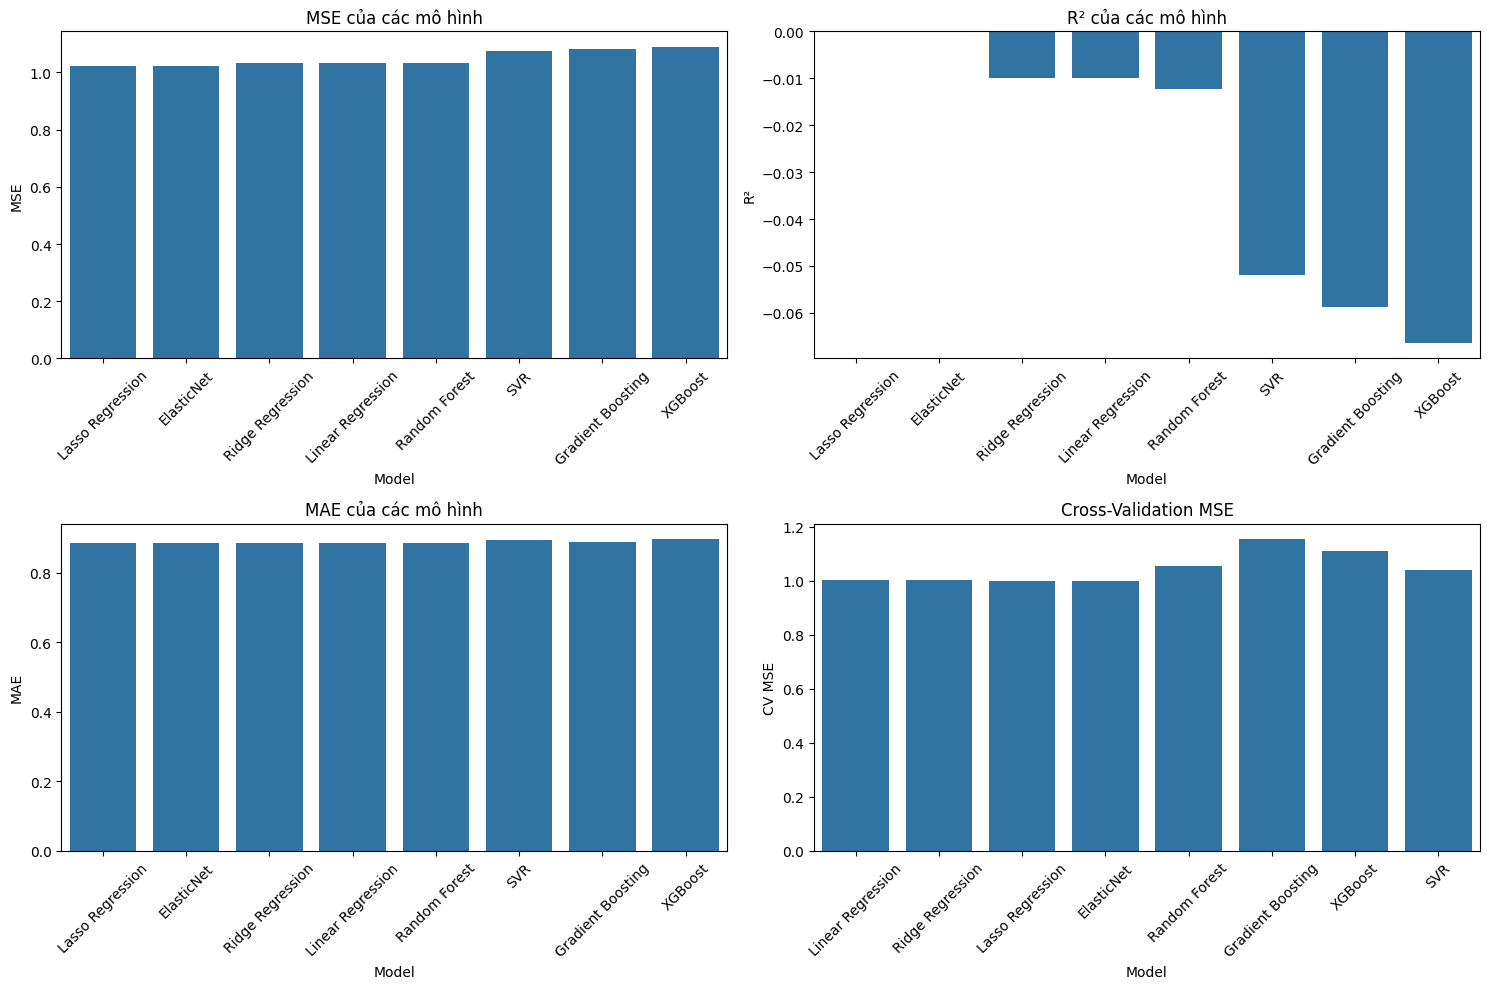

In [34]:

# Chuyển kết quả sang DataFrame để dễ so sánh
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R²', 'MAE'])
results_df = results_df.sort_values('MSE')

# 3. Trực quan hóa kết quả so sánh
plt.figure(figsize=(15, 10))

# Biểu đồ MSE
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('MSE của các mô hình')
plt.xticks(rotation=45)

# Biểu đồ R²
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='R²', data=results_df)
plt.title('R² của các mô hình')
plt.xticks(rotation=45)

# Biểu đồ MAE
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='MAE', data=results_df)
plt.title('MAE của các mô hình')
plt.xticks(rotation=45)

# Điểm cross-validation
plt.subplot(2, 2, 4)
cv_scores_df = pd.DataFrame(list(cv_scores.items()), columns=['Model', 'CV MSE'])
sns.barplot(x='Model', y='CV MSE', data=cv_scores_df)
plt.title('Cross-Validation MSE')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [35]:

# 4. Tối ưu hóa mô hình tốt nhất
best_model_name = results_df.iloc[0]['Model']
print(f"Mô hình tốt nhất: {best_model_name}")

# Chọn mô hình tốt nhất để tối ưu hóa
if best_model_name == 'Random Forest':
    # Thiết lập tìm kiếm siêu tham số
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    
    # Sử dụng RandomizedSearchCV thay vì GridSearchCV để tiết kiệm thời gian
    grid_search = RandomizedSearchCV(
        estimator=RandomForestRegressor(random_state=42),
        param_distributions=param_grid,
        n_iter=20,
        cv=5,
        scoring='neg_mean_squared_error',
        random_state=42,
        n_jobs=-1
    )
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'subsample': [0.8, 0.9, 1.0]
    }
    
    grid_search = RandomizedSearchCV(
        estimator=GradientBoostingRegressor(random_state=42),
        param_distributions=param_grid,
        n_iter=20,
        cv=5,
        scoring='neg_mean_squared_error',
        random_state=42,
        n_jobs=-1
    )
elif best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
    
    grid_search = RandomizedSearchCV(
        estimator=XGBRegressor(random_state=42),
        param_distributions=param_grid,
        n_iter=20,
        cv=5,
        scoring='neg_mean_squared_error',
        random_state=42,
        n_jobs=-1
    )
else:  # Linear models
    param_grid = {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # only for ElasticNet
    }
    
    if best_model_name == 'Ridge Regression':
        grid_search = GridSearchCV(
            estimator=Ridge(random_state=42),
            param_grid={'alpha': param_grid['alpha']},
            cv=5,
            scoring='neg_mean_squared_error',
            n_jobs=-1
        )
    elif best_model_name == 'Lasso Regression':
        grid_search = GridSearchCV(
            estimator=Lasso(random_state=42),
            param_grid={'alpha': param_grid['alpha']},
            cv=5,
            scoring='neg_mean_squared_error',
            n_jobs=-1
        )
    elif best_model_name == 'ElasticNet':
        grid_search = GridSearchCV(
            estimator=ElasticNet(random_state=42),
            param_grid=param_grid,
            cv=5,
            scoring='neg_mean_squared_error',
            n_jobs=-1
        )
    else:  # Linear Regression has no hyperparameters to tune
        grid_search = None

# Thực hiện tìm kiếm siêu tham số
if grid_search is not None:
    print("Đang thực hiện tìm kiếm siêu tham số...")
    grid_search.fit(X, y)
    print(f"Siêu tham số tốt nhất: {grid_search.best_params_}")
    optimized_model = grid_search.best_estimator_
else:
    optimized_model = LinearRegression()
    optimized_model.fit(X_train, y_train)



Mô hình tốt nhất: Lasso Regression
Đang thực hiện tìm kiếm siêu tham số...
Siêu tham số tốt nhất: {'alpha': 0.1}


In [36]:
# Đánh giá mô hình đã tối ưu hóa
y_pred_optimized = optimized_model.predict(X_test)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)

print("\nKết quả mô hình đã tối ưu hóa:")
print(f"MSE: {mse_optimized:.4f}")
print(f"R²: {r2_optimized:.4f}")
print(f"MAE: {mae_optimized:.4f}")



Kết quả mô hình đã tối ưu hóa:
MSE: 1.0214
R²: -0.0000
MAE: 0.8848


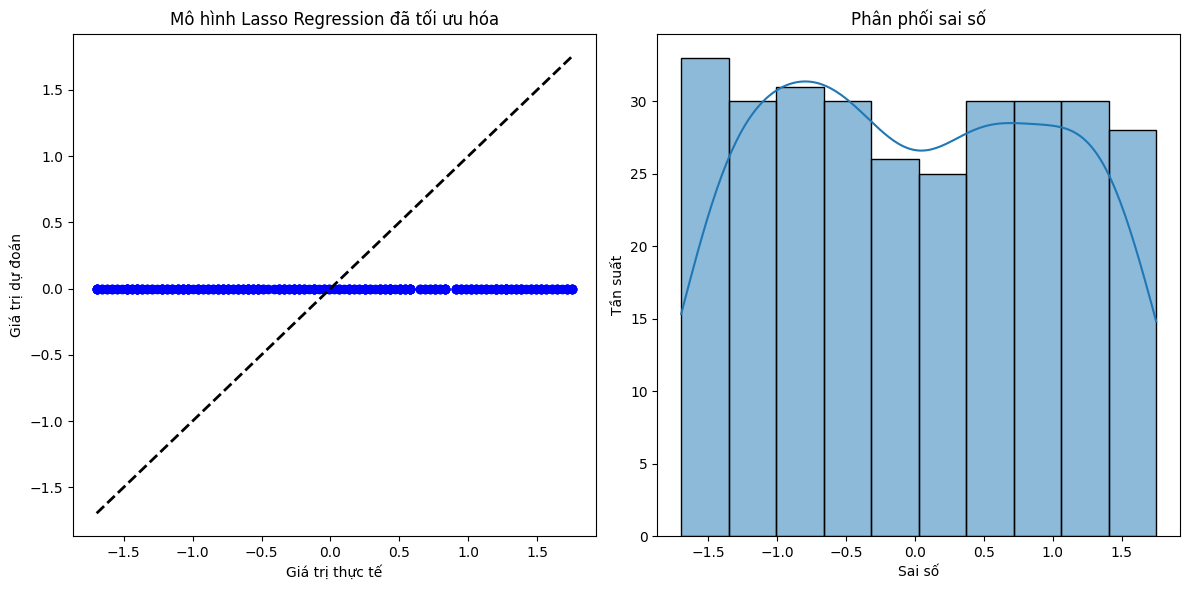


Phân tích Overfitting/Underfitting:
MSE trên tập huấn luyện: 0.9946
MSE trên tập kiểm tra: 1.0214
R² trên tập huấn luyện: -0.0000
R² trên tập kiểm tra: -0.0000
Mô hình có vẻ cân bằng.


In [37]:

# 5. So sánh mô hình ban đầu với mô hình đã tối ưu hóa
plt.figure(figsize=(12, 6))

# So sánh giá trị dự đoán và giá trị thực tế
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_optimized, color='blue', label='Dự đoán')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title(f'Mô hình {best_model_name} đã tối ưu hóa')

# Phân phối của sai số
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_optimized
sns.histplot(residuals, kde=True)
plt.xlabel('Sai số')
plt.ylabel('Tần suất')
plt.title('Phân phối sai số')

plt.tight_layout()
plt.show()

# 6. Phân tích Overfitting/Underfitting
if hasattr(optimized_model, 'predict'):
    y_train_pred = optimized_model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    print("\nPhân tích Overfitting/Underfitting:")
    print(f"MSE trên tập huấn luyện: {train_mse:.4f}")
    print(f"MSE trên tập kiểm tra: {mse_optimized:.4f}")
    print(f"R² trên tập huấn luyện: {train_r2:.4f}")
    print(f"R² trên tập kiểm tra: {r2_optimized:.4f}")
    
    if train_mse < mse_optimized * 0.5:
        print("Mô hình có dấu hiệu overfitting.")
    elif train_mse > mse_optimized * 1.5:
        print("Mô hình có dấu hiệu underfitting.")
    else:
        print("Mô hình có vẻ cân bằng.")


In [ ]:
# Tạo đặc trưng mới
df['fee_change_ratio'] = (df['Newfee'] - df['Oldfee']) / df['Oldfee']

# Nếu có thêm thông tin (ví dụ: số khóa học của giáo viên), bạn có thể thêm vào đây
print(df
      .head())


   Unnamed: 0                 Author  \
0           1       Edumall Learning   
1           2       Edumall Learning   
2           3  Nguyễn Đình Hoa Cương   
3           4  Nguyễn Đình Hoa Cương   
4           5           Trần Thảo Vi   

                                          Coursename Last_updated  Lectures  \
0              Thuyết trình chuyên nghiệp & ấn tượng   2024-08-08 -0.187891   
1          Ứng tuyển thành công - Phỏng vấn hiệu quả   2024-04-26  0.083183   
2     Procedural Python - Lập trình hàm trong Python   2024-07-03  1.641863   
3                      Python Basics - Python Cơ Bản   2022-11-02  3.200542   
4  YOGA CHO BÀ BẦU - BÍ QUYẾT CHO MỘT THAI KỲ KHỎ...   2022-07-04 -0.425082   

     Newfee    Oldfee    Rating  Sections      Time                Topic  \
0 -1.688824 -1.870263  0.761972  0.148839 -1.046567                Other   
1 -1.688824 -1.870263  0.761972  0.148839 -1.005627  Phát Triển Bản Thân   
2 -1.124077 -1.114703  0.761972  0.519103 -0.790693     

In [ ]:
df_ = df.head(10)
df_.to_csv('./df_.csv', index=False)
